#### Chebyshev's Inequality

**Basic Idea:**
Bounds the proportion of values within $k$ standard deviations from the mean, regardless of distribution.

**Conditions:**
- Finite mean $\mu$ and finite variance $\sigma^2$.
- $k > 0$.

---

**Version-1 (Upper Bound):**
$$
P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}
$$

**Version-2 (Lower Bound):**
$$
P(|X - \mu| < k\sigma) \geq 1 - \frac{1}{k^2}
$$

---

**Example (for $k = 2$):**

- **Version-1**:  
  $$
  P(|X - \mu| \geq 2\sigma) \leq 0.25
  $$

- **Version-2**:  
  $$
  P(|X - \mu| < 2\sigma) \geq 0.75
  $$


At least 75% values are within ${\pm2\sigma}$ from mean.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_samples = 1000000
k_std_dev = 2      
np.random.seed(47)
plt.style.use('dark_background')

mean = 0
std_dev = 1

# Generate a random distribution (Normal)
data = np.random.normal(loc=mean, 
                        scale=std_dev, 
                        size=n_samples)  

# Compute the proportion of values within ±k std
within_std_count = np.sum(
    np.abs(data - mean) < k_std_dev * std_dev
)
empirical_probability = (
    within_std_count / n_samples
)

# Theoretical bound by Chebyshev
chebyshev_bound = 1 - 1 / k_std_dev**2

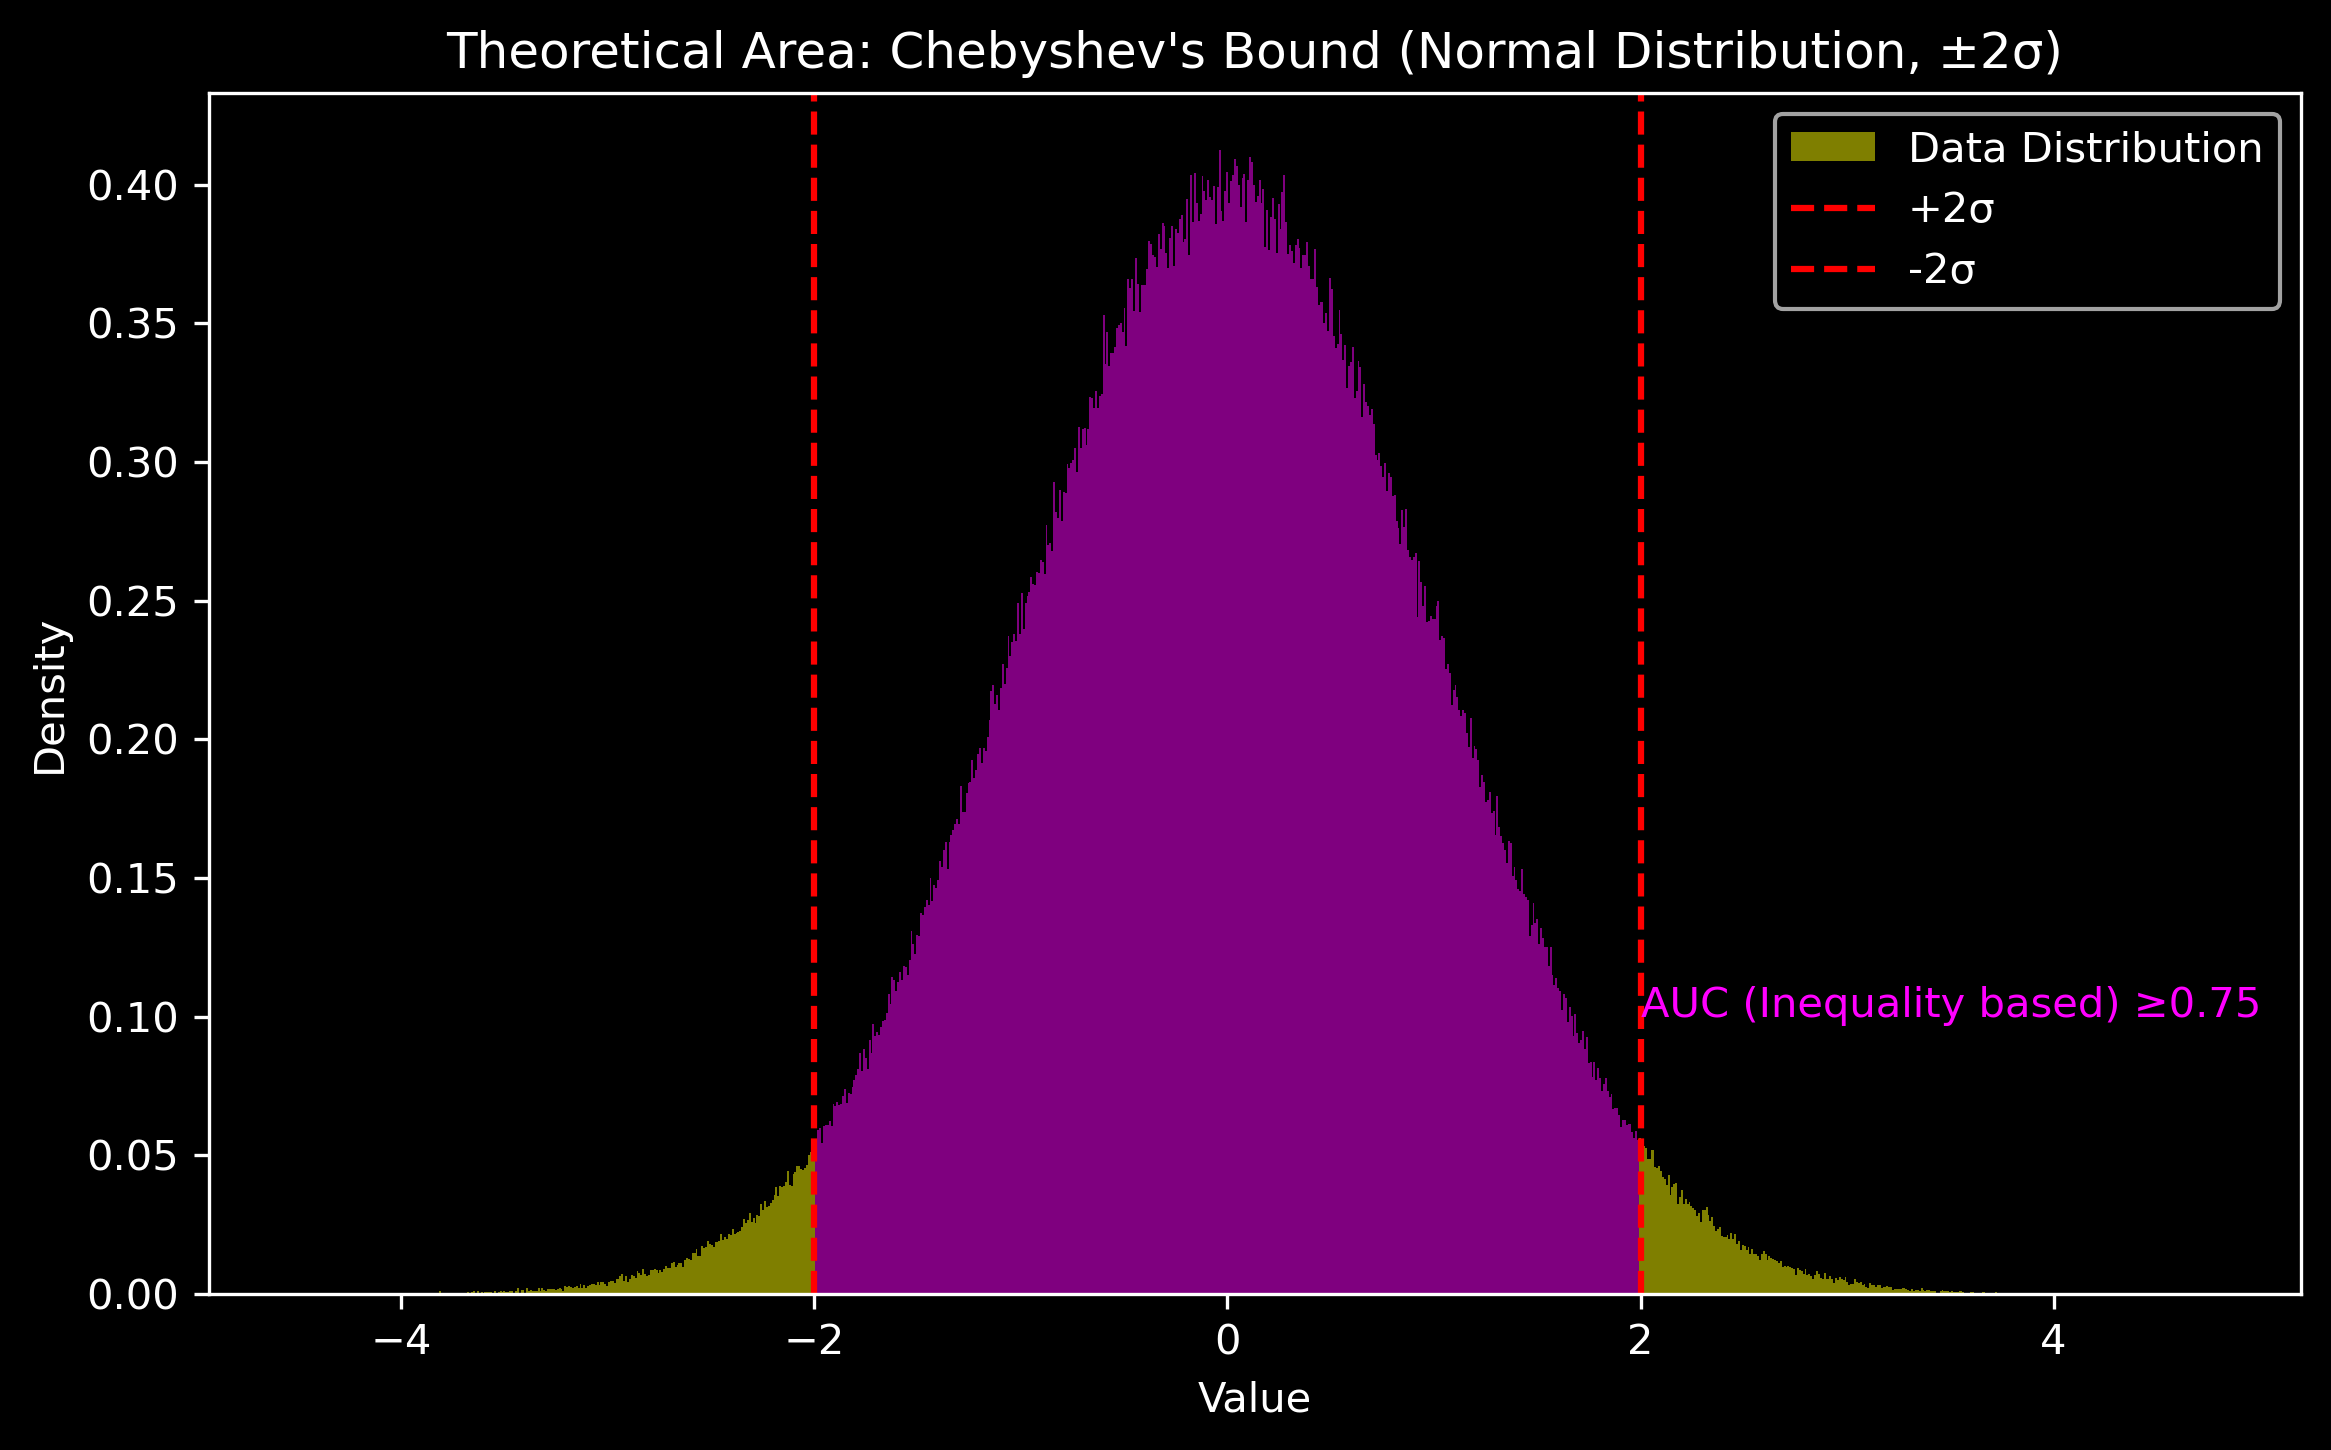

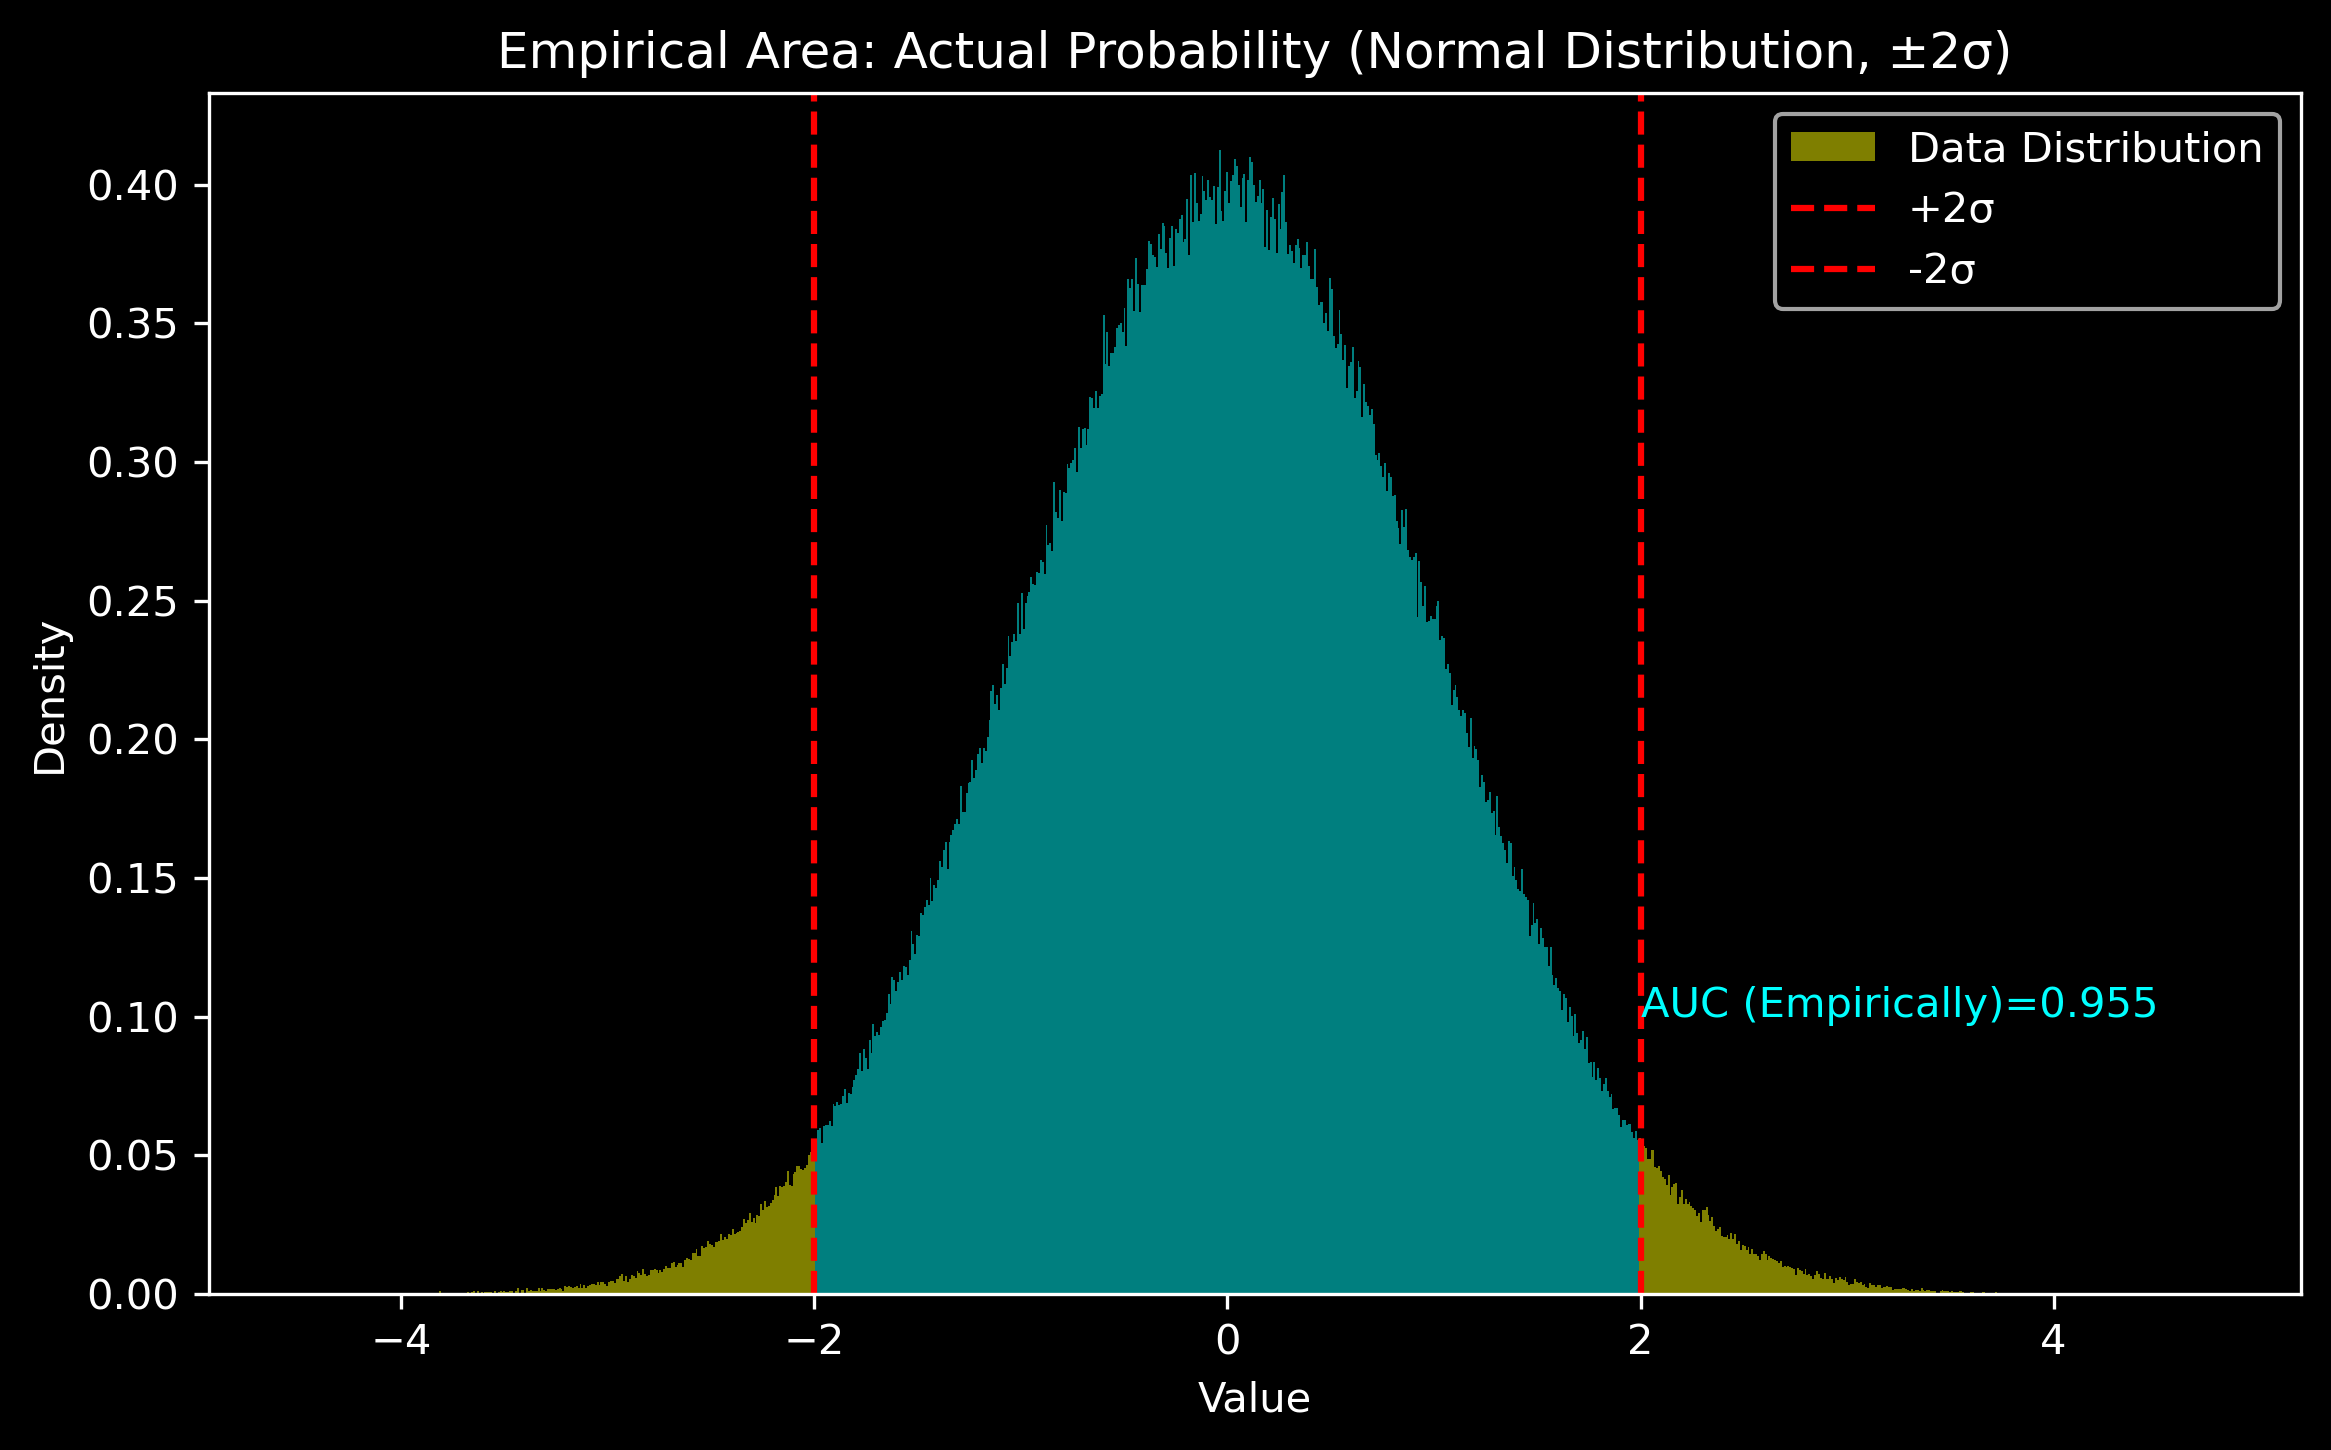

Empirical Probability within ±2σ: 0.9549
Chebyshev's Bound within ±2σ: 0.7500


In [3]:
# Plot 1: Theoretical Area (Chebyshev's Bound)
plt.figure(figsize=(9, 5.2), dpi=300)
n, bins, patches = plt.hist(data, bins=1000, alpha=0.5, density=True, label='Data Distribution', color='yellow')

# Color the histogram between ±2σ
for i in range(len(bins) - 1):
    if bins[i] >= mean - k_std_dev * std_dev and bins[i+1] <= mean + k_std_dev * std_dev:
        patches[i].set_facecolor('magenta')  # Coloring the bins within ±2σ

# Add vertical lines for ±2σ
plt.axvline(mean + k_std_dev * std_dev, color='red', linestyle='--', label=f'+{k_std_dev}σ')
plt.axvline(mean - k_std_dev * std_dev, color='red', linestyle='--', label=f'-{k_std_dev}σ')

# Annotation for Chebyshev's bound
plt.text(mean + k_std_dev * std_dev, 0.1, f"AUC (Inequality based) ≥{chebyshev_bound:.2f}", color='magenta')
plt.title(f'Theoretical Area: Chebyshev\'s Bound (Normal Distribution, ±{k_std_dev}σ)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Plot 2: Empirical Area
plt.figure(figsize=(9, 5.2), dpi=300)
n, bins, patches = plt.hist(data, bins=1000, alpha=0.5, density=True, label='Data Distribution', color='yellow')

# Color the histogram between ±2σ for empirical area
for i in range(len(bins) - 1):
    if bins[i] >= mean - k_std_dev * std_dev and bins[i+1] <= mean + k_std_dev * std_dev:
        patches[i].set_facecolor('cyan')  # Coloring the bins within ±2σ

# Add vertical lines for ±2σ
plt.axvline(mean + k_std_dev * std_dev, color='red', linestyle='--', label=f'+{k_std_dev}σ')
plt.axvline(mean - k_std_dev * std_dev, color='red', linestyle='--', label=f'-{k_std_dev}σ')

# Annotation for empirical probability
plt.text(mean + k_std_dev * std_dev, 0.1, f"AUC (Empirically)={empirical_probability:.3f}", color='cyan')
plt.title(f'Empirical Area: Actual Probability (Normal Distribution, ±{k_std_dev}σ)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

# Output results
print(f"Empirical Probability within ±{k_std_dev}σ: {empirical_probability:.4f}")
print(f"Chebyshev's Bound within ±{k_std_dev}σ: {chebyshev_bound:.4f}")